In [1]:
import pandas as pd
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/wine.csv', header=None)
X = df.iloc[:, :12]
y = df.iloc[:, 12]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [3]:
model = models.Sequential()
model.add(layers.Dense(30, input_dim=12, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

C:\Users\BIT\miniconda3\envs\ml-env\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


In [5]:
# score = model.evaluate(X_test, y_test)
# print('Test Accuracy:', score[1])

In [6]:
hist = pd.DataFrame(history.history)
hist.head()

,loss,accuracy,val_loss,val_accuracy
0,14.067563,0.239158,6.716400,0.184615
1,3.075957,0.352836,0.640405,0.763077
2,0.876389,0.755710,0.953808,0.762308
3,1.031415,0.763151,0.863275,0.792308
4,0.807073,0.800872,0.519447,0.851538


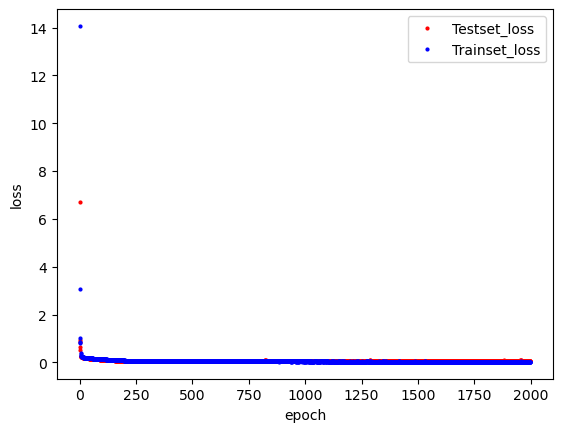

In [7]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss = hist['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss = hist['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란b색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
